# Arrests made by the Chapel Hill Police Department from 2010 to 2019

#### I'm going to analyze the data set of the Arrests made by Chapel Hill Police Department from 2010 to 2019 and derive the information like which year has the more casses, which age people were arrested and also the age group they belong to and also the violation they made

In [60]:
import pandas as pd
import matplotlib.pyplot as plt #for plotting
import seaborn as sns # #for statistical graphics 
import missingno as mn

In [42]:
df1 = pd.read_csv('./Arrests.csv')

In [43]:
df1.head()

,Incident Id,Primary Charge,Street,City,State,Zipcode,Date of Arrest,Time of Arrest,Age,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition,latitude_longitude
0,40515,ASSAULT-SIMPLE,117 OLD DURHAM RD,CHAPEL HILL,NC,27517.0,8/26/2019,10:17 PM,25.0,W,F,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,"35.94424056, -79.01174063"
1,40498,FAIL TO APPEAR/COMPL,214 W ROSEMARY ST,CHAPEL HILL,NC,27516.0,8/26/2019,8:51 AM,27.0,B,M,N,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,CLEARED BY ARREST,"35.913341985, -79.058293957"
2,40496,PUBLIC URINATION,107 EPHESUS CHURCH RD/LEGION RD,CHAPEL HILL,NC,27517.0,8/26/2019,8:15 PM,57.0,B,M,N,SUMMONED/CITED,Y,UNARMED,CLEARED BY ARREST,"35.935056, -79.0219395"
3,40497,AFFRAY/ASSAULT & BATTERY,117 OLD DURHAM RD,CHAPEL HILL,NC,27517.0,8/26/2019,10:17 PM,55.0,B,M,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,"35.94424056, -79.01174063"
4,40495,ASSAULT-SIMPLE,233 MCCAULEY STREET,CHAPEL HILL,NC,27514.0,8/26/2019,7:27 AM,21.0,W,F,N,SUMMONED/CITED,N,UNARMED,CLEARED BY ARREST,"35.907198362, -79.057233541"


### Highlevel visualization for missing values

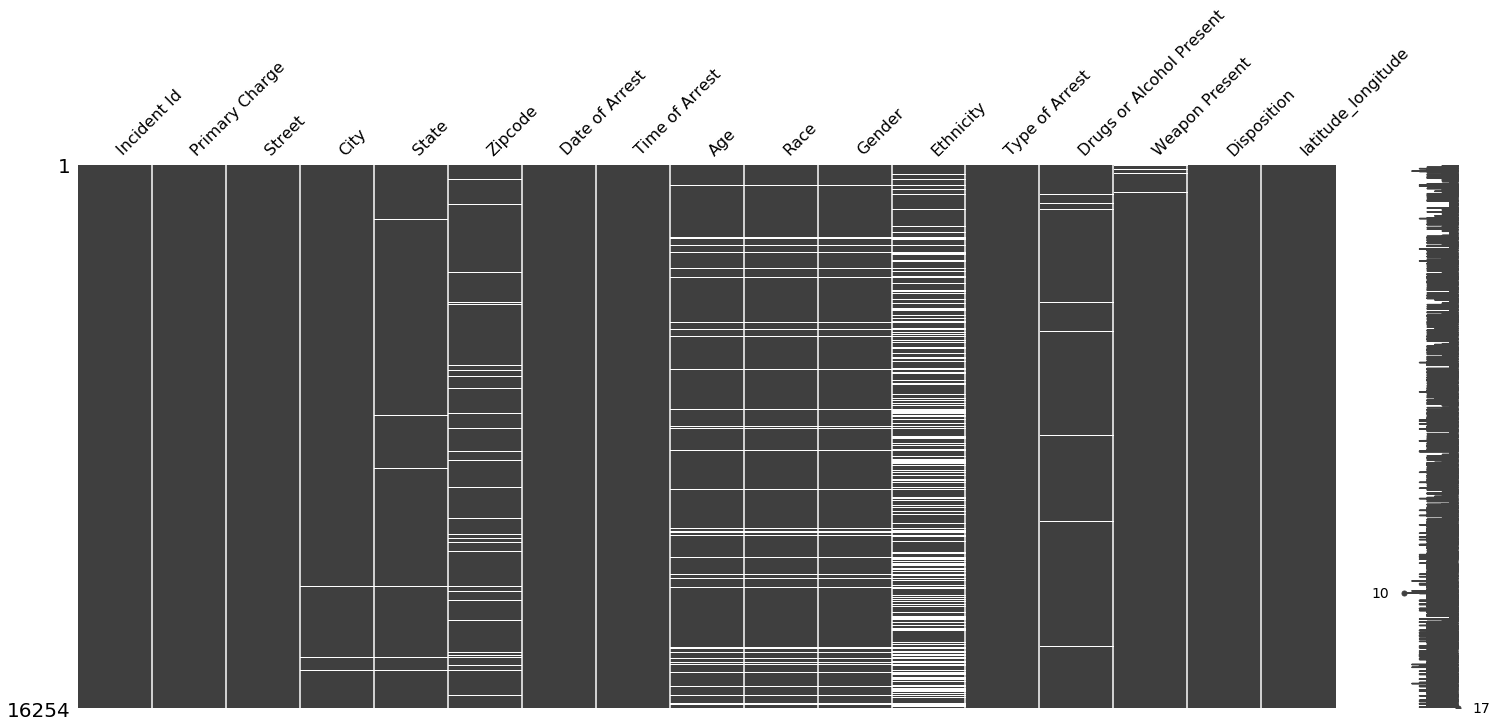

In [44]:
mn.matrix(df1) 

### Finding the missing values percentage of the dataframe


In [45]:
def getMissingValueDetails(data):
    # check missing values in data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):") 
        print(missing_value_stats)
    else:
        print("No misisng data!!!")
getMissingValueDetails(df1)

Number of columns with missing values: 12

Missing percentage (desceding):
Ethnicity                   30.306386
Gender                       5.961609
Race                         5.961609
Age                          5.955457
Zipcode                      5.463271
Drugs or Alcohol Present     2.147164
Weapon Present               0.578319
State                        0.449120
City                         0.295312
Street                       0.086133
Disposition                  0.055371
Type of Arrest               0.006152
dtype: float64


#### As the missing values percentage is negligible, we can proceed with the Analysis

In [46]:
df1.rename(columns = {'Date of Arrest':'Arrest_Date','Drugs or Alcohol Present':'Drug'}, inplace = True)

#### Deriving Year and Weekday name out of the date column

In [47]:
df1['Arrest_Date'] =  pd.to_datetime(df1['Arrest_Date'], infer_datetime_format= True) 

In [48]:
df1['Year'] = df1['Arrest_Date'].dt.year
df1['WeekDay'] = df1['Arrest_Date'].dt.weekday_name

In [49]:
df1.head()

,Incident Id,Primary Charge,Street,City,State,Zipcode,Arrest_Date,Time of Arrest,Age,Race,Gender,Ethnicity,Type of Arrest,Drug,Weapon Present,Disposition,latitude_longitude,Year,WeekDay
0,40515,ASSAULT-SIMPLE,117 OLD DURHAM RD,CHAPEL HILL,NC,27517.0,2019-08-26,10:17 PM,25.0,W,F,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,"35.94424056, -79.01174063",2019,Monday
1,40498,FAIL TO APPEAR/COMPL,214 W ROSEMARY ST,CHAPEL HILL,NC,27516.0,2019-08-26,8:51 AM,27.0,B,M,N,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,CLEARED BY ARREST,"35.913341985, -79.058293957",2019,Monday
2,40496,PUBLIC URINATION,107 EPHESUS CHURCH RD/LEGION RD,CHAPEL HILL,NC,27517.0,2019-08-26,8:15 PM,57.0,B,M,N,SUMMONED/CITED,Y,UNARMED,CLEARED BY ARREST,"35.935056, -79.0219395",2019,Monday
3,40497,AFFRAY/ASSAULT & BATTERY,117 OLD DURHAM RD,CHAPEL HILL,NC,27517.0,2019-08-26,10:17 PM,55.0,B,M,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,"35.94424056, -79.01174063",2019,Monday
4,40495,ASSAULT-SIMPLE,233 MCCAULEY STREET,CHAPEL HILL,NC,27514.0,2019-08-26,7:27 AM,21.0,W,F,N,SUMMONED/CITED,N,UNARMED,CLEARED BY ARREST,"35.907198362, -79.057233541",2019,Monday


#### Knowing on which day were most of the Arrests made

In [50]:
df1['WeekDay'].value_counts()

Saturday     3198
Friday       2646
Sunday       2331
Thursday     2258
Wednesday    2096
Tuesday      1934
Monday       1791
Name: WeekDay, dtype: int64

#### Year wise count

In [59]:
df1['Year'].value_counts()

2010    1939
2015    1864
2011    1845
2014    1740
2013    1722
2016    1722
2012    1658
2018    1487
2017    1430
2019     847
Name: Year, dtype: int64

#### Count by Violation

In [51]:
df1['Primary Charge'].value_counts()

FAIL TO APPEAR/COMPL                          1687
IMPAIRED DRIVING DWI                          1551
OPEN CONTAINER                                1245
POSSESSION MARIJUANA                           616
2ND DEGREE TRESPASS                            481
                                              ... 
VANDALISM TO PUBLIC PROPERTY                     1
FTA (CCW)                                        1
UNDERAGE POSSESSION ALCOHOL                      1
POSSESSION LIQUOR ON UNAUTHORIZED PREMISES       1
NON-SUPPORT CHILD  M                             1
Name: Primary Charge, Length: 1188, dtype: int64

In [52]:
age =pd.DataFrame(df1.groupby(['Age'])['Age'].count())


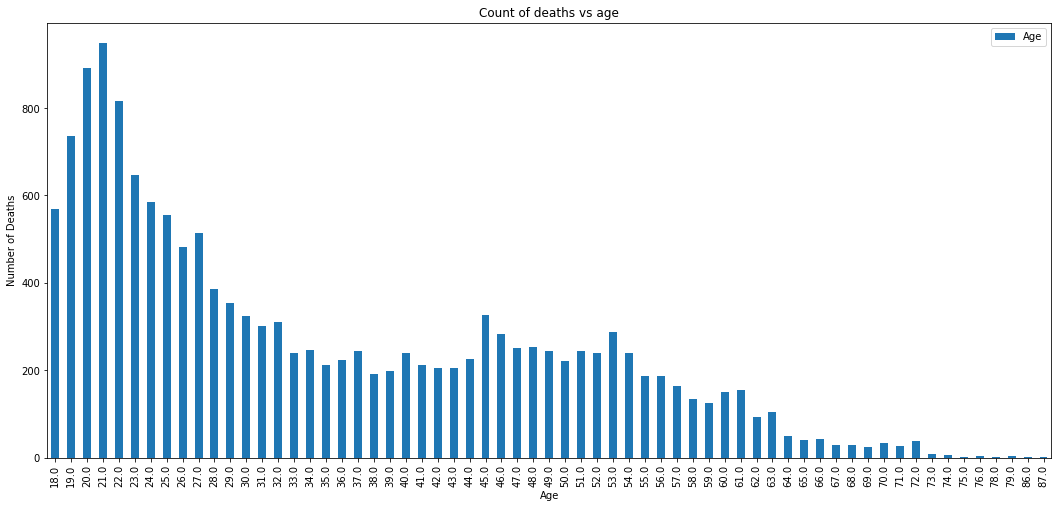

In [53]:
age.plot.bar(figsize =(18,8))
plt.ylabel('Number of Deaths')
plt.title('Count of deaths vs age')
plt.show()


### We can  see that people with Age 21 are arrested more in 2010 to 2019 time period for any violations

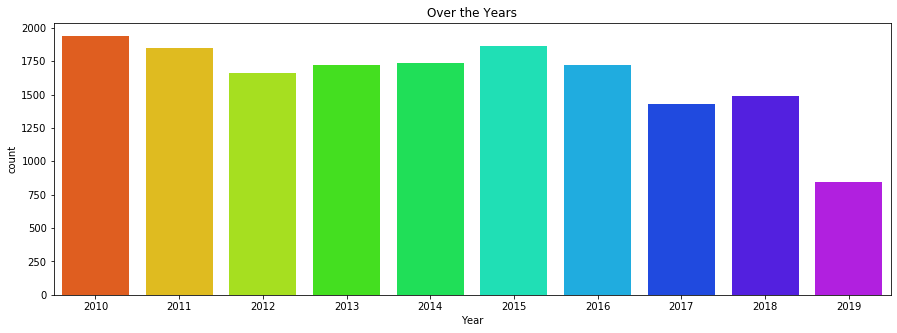

In [54]:
plt.figure(figsize = (15,5))
fig = sns.countplot(x= 'Year', data = df1, palette = 'gist_rainbow')
fig.set_title("Over the Years")
plt.show()

### We can say that 2010 has more number of arrests

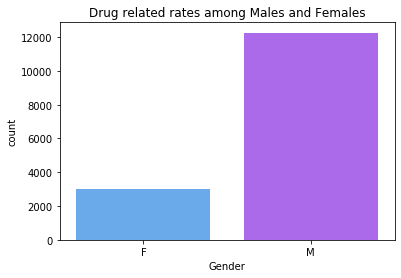

In [55]:
fig = sns.countplot(x = 'Gender', data = df1, palette = 'cool')
fig.set_title('Drug related rates among Males and Females')
plt.show()

### Among the people arrested, Males were more than Females

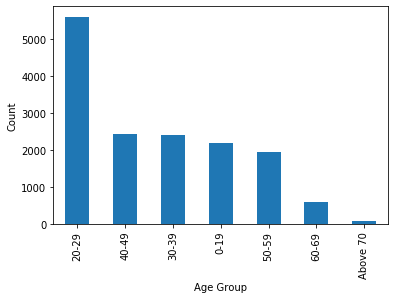

In [56]:
age = (df1.Age.value_counts().index.tolist())
agedf = pd.DataFrame (df1['Age'], columns =['Age'])
bins = [0,20,30,40,50,60,70,80]
labels = ['0-19','20-29','30-39','40-49','50-59','60-69','Above 70']
agedf['arrange'] = pd.cut(agedf.Age, bins, labels=labels,include_lowest = True)
df1['arrange']= agedf['arrange']
df1['arrange'].value_counts().plot.bar()
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Analysis according to their Age group

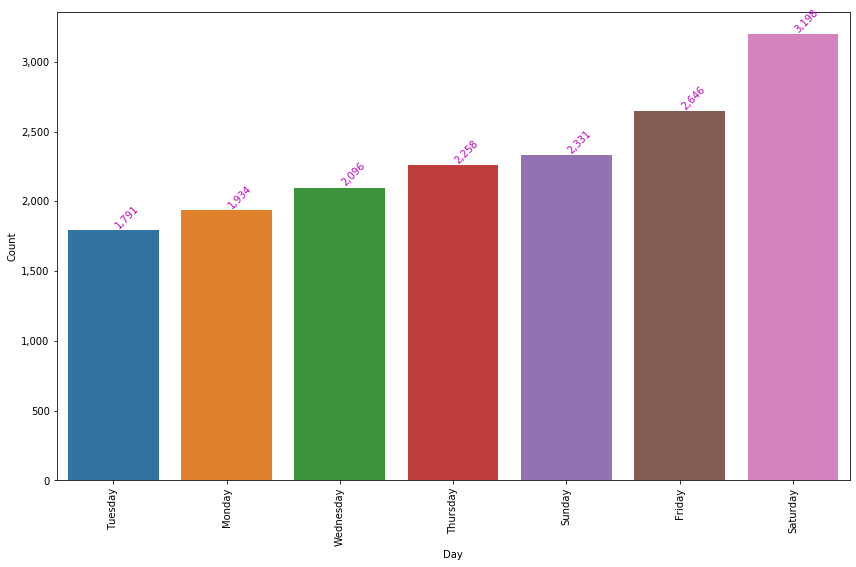

In [58]:
dicti=({'Friday':2646,'Saturday':3198,'Sunday':2331,'Monday':1934,'Tuesday':1791,'Thursday':2258,'Wednesday' : 2096
})
pd_df = pd.DataFrame(list(dicti.items()))
pd_df.columns =["Day","Count"]
pd_df = pd_df.sort_values(['Count']).reset_index(drop=True)
plt.figure(figsize=(12,8))
ax = sns.barplot(pd_df.index, pd_df.Count)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Day", ylabel='Count')
ax.set_xticklabels(pd_df.Day)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(pd_df["Count"].iteritems()):
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

### Visualization of arrests made on various days of the week

In [31]:
by_violation =  pd.DataFrame(df1['Primary Charge'].value_counts())

In [32]:
by_violation

,Primary Charge
FAIL TO APPEAR/COMPL,1687
IMPAIRED DRIVING DWI,1551
OPEN CONTAINER,1245
POSSESSION MARIJUANA,616
2ND DEGREE TRESPASS,481
...,...
VANDALISM TO PUBLIC PROPERTY,1
FTA (CCW),1
UNDERAGE POSSESSION ALCOHOL,1
POSSESSION LIQUOR ON UNAUTHORIZED PREMISES,1


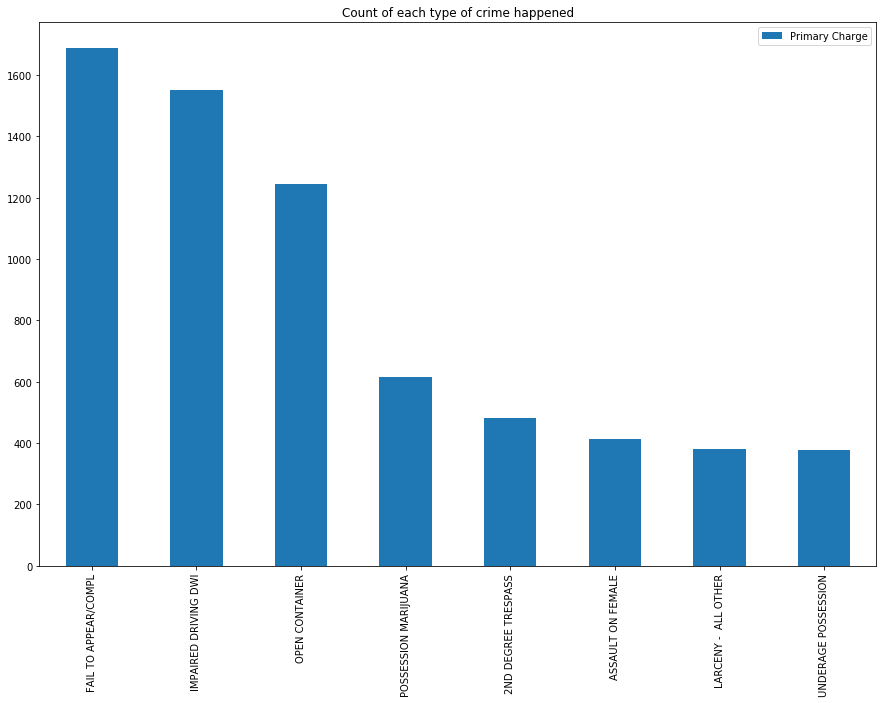

In [33]:
by_violation[by_violation['Primary Charge']>300].plot.bar(title='Count of each type of crime happened', figsize = (15,10))


### Analysis according to their violations